In [ ]:
#Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
# set your spark folder to your system path environment.
import os

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
# Install library for finding Spark
!pip install -q findspark

In [ ]:
# Import the libary
import findspark

In [ ]:
# Initiate findspark
findspark.init()

In [ ]:
# Check the location for Spark
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
import pandas as pd

%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn


import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession

In [ ]:
#Create a Spark Session
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing (1).csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [ ]:
df1 = spark.read.csv('BostonHousing.csv', inferSchema = True, header = True)

In [ ]:
df1.head()

Row(crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, b=396.9, lstat=4.98, medv=24.0)

In [ ]:
# Print the description of dataframe
df1.describe

<bound method DataFrame.describe of DataFrame[crim: double, zn: double, indus: double, chas: int, nox: double, rm: double, age: double, dis: double, rad: int, tax: int, ptratio: double, b: double, lstat: double, medv: double]>

In [ ]:
# Print the columns of dataframe
df1.columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [ ]:
# Convert the dataframe to pandas.
BostonDF = df1.toPandas()

In [ ]:
BostonDF.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from pyspark.sql.functions import round, col
BostonDF = BostonDF.round(2)

In [ ]:
BostonDF.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2


In [ ]:
BostonDF.count

<bound method DataFrame.count of      crim    zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  \
0    0.01  18.0   2.31     0  0.54  6.58  65.2  4.09    1  296     15.3   
1    0.03   0.0   7.07     0  0.47  6.42  78.9  4.97    2  242     17.8   
2    0.03   0.0   7.07     0  0.47  7.18  61.1  4.97    2  242     17.8   
3    0.03   0.0   2.18     0  0.46  7.00  45.8  6.06    3  222     18.7   
4    0.07   0.0   2.18     0  0.46  7.15  54.2  6.06    3  222     18.7   
..    ...   ...    ...   ...   ...   ...   ...   ...  ...  ...      ...   
501  0.06   0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   
502  0.05   0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   
503  0.06   0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   
504  0.11   0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   
505  0.05   0.0  11.93     0  0.57  6.03  80.8  2.50    1  273     21.0   

          b  lstat  medv  
0    396.90   4.98  24.0  
1    396.90 

In [ ]:
# Print the summary statistics.

BostonDF.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613419,11.363636,11.136779,0.069170,0.554111,6.284684,68.574901,3.795336,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601602,23.322453,6.860353,0.253994,0.115536,0.702713,28.148861,2.105783,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.010000,0.000000,0.460000,0.000000,0.380000,3.560000,2.900000,1.130000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.080000,0.000000,5.190000,0.000000,0.450000,5.882500,45.025000,2.100000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.255000,0.000000,9.690000,0.000000,0.540000,6.210000,77.500000,3.210000,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677500,12.500000,18.100000,0.000000,0.620000,6.620000,94.075000,5.187500,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.980000,100.000000,27.740000,1.000000,0.870000,8.780000,100.000000,12.130000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


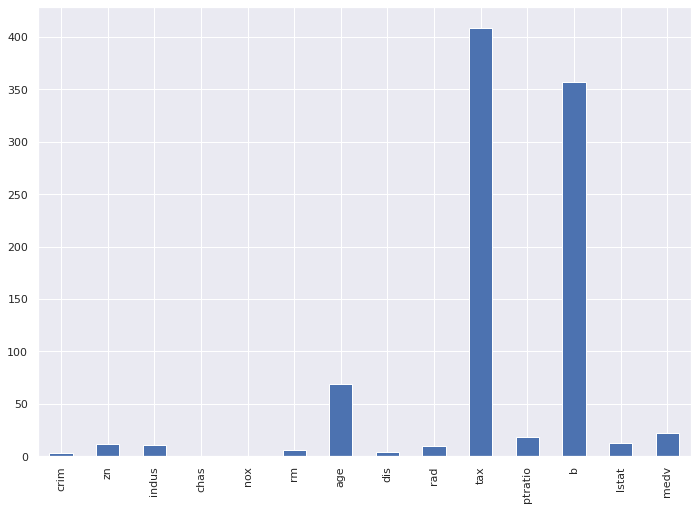

In [ ]:
BostonDF.describe().loc["mean"].plot.bar()

[]

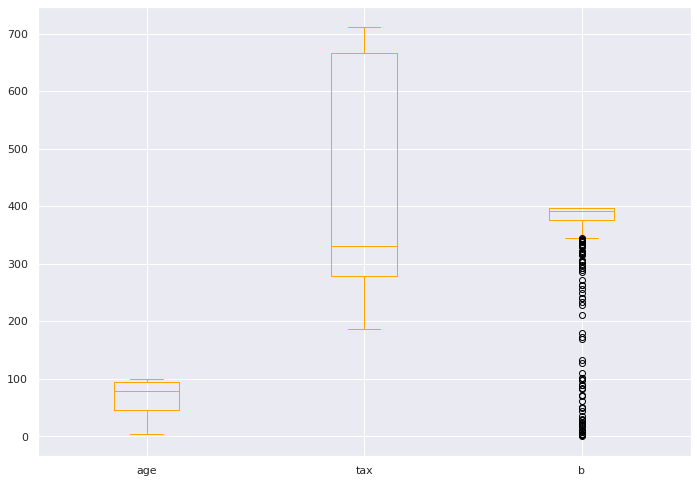

In [ ]:
#BostonDF.plot(kind = "box",margin = (0,0,0,0), bestfit = True,keys = [x for x in BostonDF.columns if x in ["tax", "b", "age"]])
plot1 = BostonDF.boxplot(column = ['age','tax','b'], color = 'orange')
plot1.plot()

[]

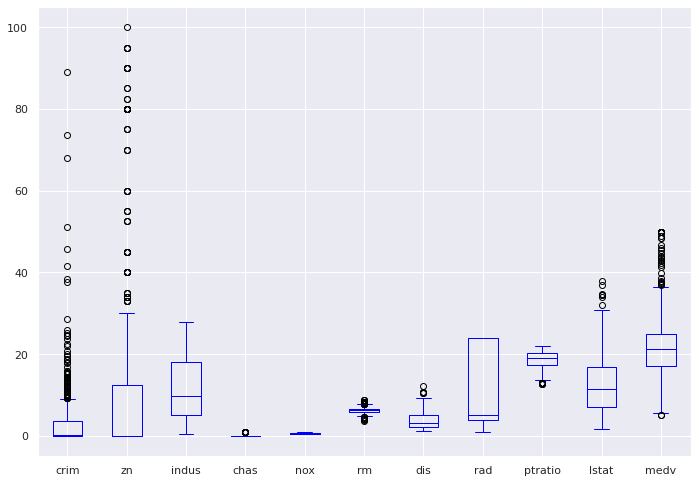

In [ ]:
plot2 = BostonDF.boxplot(column = ['crim','zn','indus','chas','nox','rm','dis','rad','ptratio','lstat','medv'], color = 'blue')
plot2.plot()

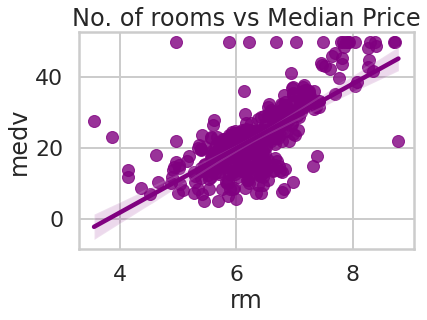

In [ ]:
#################### Build linear regression model ####################################
# As a first step, we shall see relationship between different factors.

# Between medv and No. of rooms
sns.regplot(x="rm",y="medv", data=BostonDF, fit_reg=True, color = 'purple')
plt.title("No. of rooms vs Median Price")
plt.show()

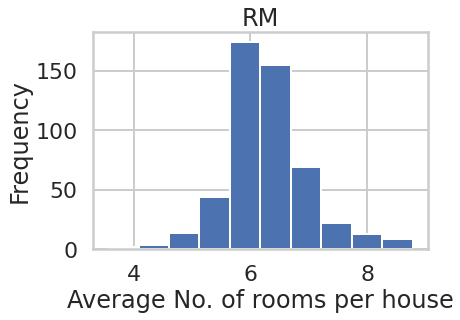

In [ ]:
plt.hist(BostonDF.rm)
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()

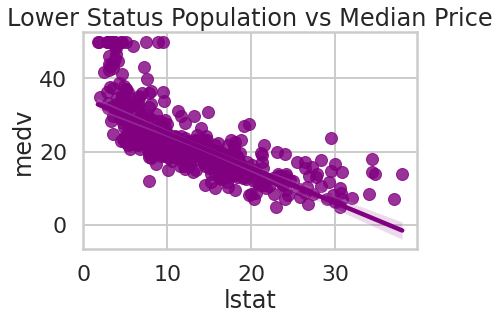

In [ ]:
# Between prices and Lower Status Population
sns.regplot(y="medv",x="lstat", data=BostonDF, fit_reg= True, color = 'purple')
plt.title("Lower Status Population vs Median Price")
plt.show()

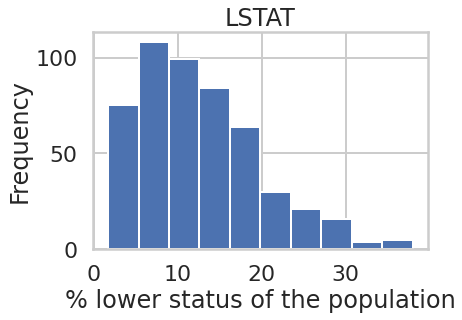

In [ ]:
 plt.hist(BostonDF.lstat)
plt.xlabel("% lower status of the population")
plt.ylabel("Frequency")
plt.title("LSTAT")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


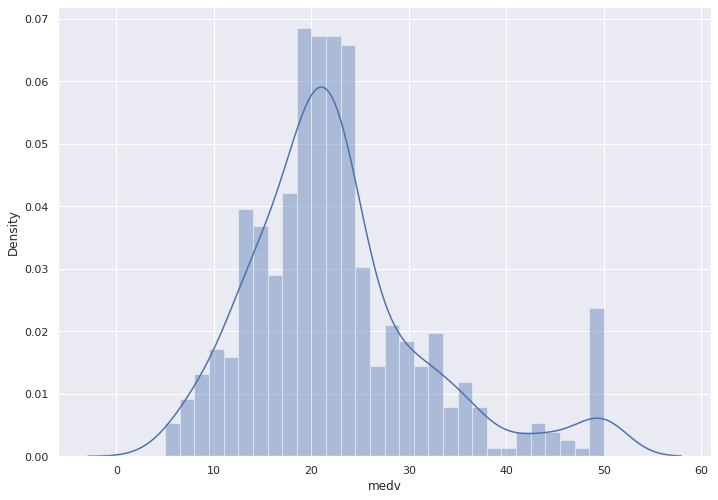

In [ ]:
# Find the distribution of target variable - medv

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(BostonDF['medv'], bins=30)
plt.show()

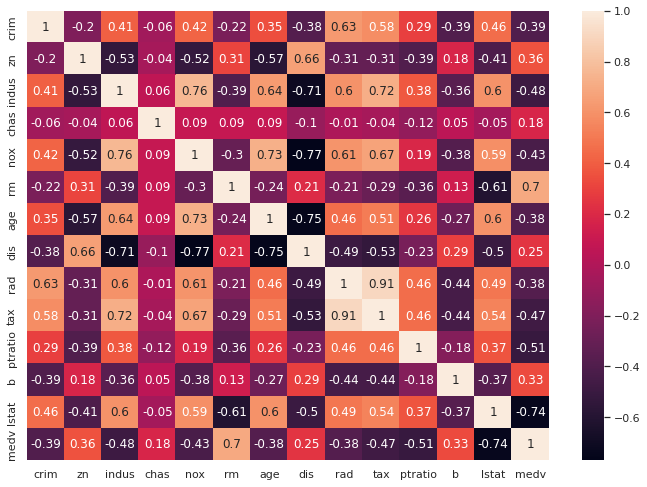

In [ ]:
# Correlation Matrix.

correlation_matrix = BostonDF.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
X = BostonDF.iloc[:,:-1]
y = BostonDF.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [90]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [85]:
# Model training.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test)) 

MAE 3.609644456305679
MSE 27.221870782796127
RMSE 5.217458268428807
Score: 0.673071437208872


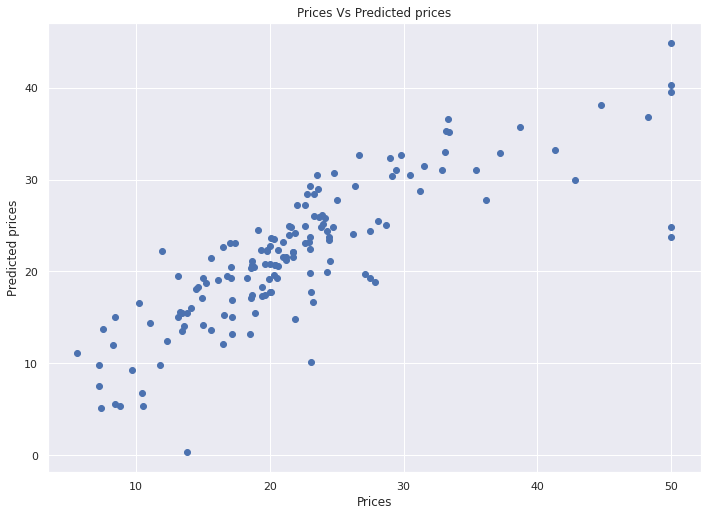

In [91]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices Vs Predicted prices")
plt.show()